In [1]:
import pandas as pd

In [2]:
# Importing the dataset
df_dev = pd.read_csv('development.csv', sep=',', encoding="ISO-8859-1", index_col=False, dtype={'ids': int})
df_eval = pd.read_csv('evaluation.csv', sep=',', encoding="ISO-8859-1", index_col=False, dtype={'ids': int})

In [3]:
data_dev = df_dev[['text', 'sentiment']]
dataset_dev = pd.concat([df_dev])
dataset_dev['text']=dataset_dev['text'].str.lower()
dataset_dev['text'].tail()


224989    @dropsofreign yeah i hope iran people reach fr...
224990                            trying the qwerty keypad 
224991    i love jasper &amp; jackson but that wig in th...
224992    i am really tired and bored and bleh! i feel c...
224993    @alyshatan good luck!! it sounds interesting t...
Name: text, dtype: object

In [4]:
data_eval = df_eval[['text']]
dataset_eval = pd.concat([df_eval])
dataset_eval['text'] = dataset_eval['text'].str.lower()
dataset_eval['text'].tail()

74994    @niyana man down,code 10...i'm going 2 try &am...
74995    @senhordaguerra thank you for following me: i ...
74996    why isn't friday's hollyoaks available for dow...
74997    @hollywilli she was !!! she was a madam they q...
74998    plans for today = shower, shopping, rent some ...
Name: text, dtype: object

In [5]:
#balance checking
df_dev['sentiment'].value_counts()

1    130157
0     94837
Name: sentiment, dtype: int64

In [6]:
#balancing
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_dev[df_dev.sentiment==1]
df_minority = df_dev[df_dev.sentiment==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=94836,     # to match minority class
                                 random_state=10)
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.sentiment.value_counts()
df_dev = df_downsampled

In [7]:
df_dev['sentiment'].value_counts()

0    94837
1    94836
Name: sentiment, dtype: int64

In [8]:
import re

def cleaning_username(text):
    return re.sub('@[^\s]+','',text)


dataset_dev['text'] = dataset_dev['text'].apply(lambda x: cleaning_username(x))
dataset_eval['text'] = dataset_eval['text'].apply(lambda x: cleaning_username(x))
dataset_eval['text'].head()

0     i'm pretty much the same ...in either &quot;w...
1                    same here  have a gr8 week ahead 
2                      that's just nightmares all over
3      chã¡âºâ¯c phã¡âºâ£i ãâi thi ãâã¡âºâ¡i hã...
4                      awe. ok sweetie. ttyl.   *hugs*
Name: text, dtype: object

In [9]:
def cleaning_URLs(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)


dataset_dev['text'] = dataset_dev['text'].apply(lambda x: cleaning_URLs(x))
dataset_eval['text'] = dataset_eval['text'].apply(lambda x: cleaning_URLs(x))
dataset_eval['text'].head()

0     i'm pretty much the same ...in either &quot;w...
1                    same here  have a gr8 week ahead 
2                      that's just nightmares all over
3      chã¡âºâ¯c phã¡âºâ£i ãâi thi ãâã¡âºâ¡i hã...
4                      awe. ok sweetie. ttyl.   *hugs*
Name: text, dtype: object

In [10]:
def cleaning_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)


dataset_dev['text'] = dataset_dev['text'].apply(lambda x: cleaning_html(x))
dataset_eval['text'] = dataset_eval['text'].apply(lambda x: cleaning_html(x))
dataset_eval['text'].head()

0     i'm pretty much the same ...in either &quot;w...
1                    same here  have a gr8 week ahead 
2                      that's just nightmares all over
3      chã¡âºâ¯c phã¡âºâ£i ãâi thi ãâã¡âºâ¡i hã...
4                      awe. ok sweetie. ttyl.   *hugs*
Name: text, dtype: object

In [11]:
# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text


dataset_dev['text'] = dataset_dev['text'].apply(lambda x: decontraction(x))
dataset_eval['text'] = dataset_eval['text'].apply(lambda x: decontraction(x))
dataset_eval['text'].head()

0     i am pretty much the same ...in either &quot;...
1                    same here  have a gr8 week ahead 
2                     that is just nightmares all over
3      chã¡âºâ¯c phã¡âºâ£i ãâi thi ãâã¡âºâ¡i hã...
4                      awe. ok sweetie. ttyl.   *hugs*
Name: text, dtype: object

In [12]:
def seperating_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)


dataset_dev['text'] = dataset_dev['text'].apply(lambda x: seperating_alphanumeric(x))
dataset_eval['text'] = dataset_eval['text'].apply(lambda x: seperating_alphanumeric(x))
dataset_eval['text'].head()

0    i am pretty much the same in either quot world...
1                     same here have a gr 8 week ahead
2                     that is just nightmares all over
3    chã âºâ c phã âºâ i ã â i thi ã â ã âºâ i hã â...
4                             awe ok sweetie ttyl hugs
Name: text, dtype: object

In [13]:
def cleaning_numbers(text):
    return re.sub('[0-9]+', '', text)


dataset_dev['text'] = dataset_dev['text'].apply(lambda x: cleaning_numbers(x))
dataset_eval['text'] = dataset_eval['text'].apply(lambda x: cleaning_numbers(x))
dataset_eval['text'].head()

0    i am pretty much the same in either quot world...
1                      same here have a gr  week ahead
2                     that is just nightmares all over
3    chã âºâ c phã âºâ i ã â i thi ã â ã âºâ i hã â...
4                             awe ok sweetie ttyl hugs
Name: text, dtype: object

In [14]:
def char(text):
    substitute = re.sub(r'[^a-zA-Z]', ' ', text)
    return substitute


dataset_dev['text'] = dataset_dev['text'].apply(lambda x: char(x))
dataset_eval['text'] = dataset_eval['text'].apply(lambda x: char(x))
dataset_eval['text'].head()

0    i am pretty much the same in either quot world...
1                      same here have a gr  week ahead
2                     that is just nightmares all over
3    ch      c ph      i     i thi           i h   ...
4                             awe ok sweetie ttyl hugs
Name: text, dtype: object

In [15]:
def small_char(text):
    text = ' '.join([word for word in text.split() if len(word) > 2])
    return text


dataset_dev['text'] = dataset_dev['text'].apply(lambda x: small_char(x))
dataset_eval['text'] = dataset_eval['text'].apply(lambda x: small_char(x))
dataset_eval['text'].head()

0    pretty much the same either quot world quot
1                      same here have week ahead
2                  that just nightmares all over
3                                            thi
4                          awe sweetie ttyl hugs
Name: text, dtype: object

In [16]:
def cleaning_slang(text):
    # open the file slang.txt
    file = open("slang", "r")
    slang = file.read()

    # separating each line present in the file
    slang = slang.split('\n')

    tweet_tokens = text.split()
    slang_word = []
    meaning = []

    # store the slang words and meanings in different lists
    for line in slang:
        temp = line.split("=")
        slang_word.append(temp[0])
        meaning.append(temp[-1])

    # replace the slang word with meaning
    for i, word in enumerate(tweet_tokens):
        if word in slang_word:
            idx = slang_word.index(word)
            tweet_tokens[i] = meaning[idx]

    return " ".join(tweet_tokens)


dataset_dev['text'] = dataset_dev['text'].apply(lambda x: cleaning_slang(x))
dataset_eval['text'] = dataset_eval['text'].apply(lambda x: cleaning_slang(x))
dataset_eval['text'].head()

0    pretty much the same either quot world quot
1                      same here have week ahead
2                  that just nightmares all over
3                                            thi
4             awe sweetie talk to you later hugs
Name: text, dtype: object

In [17]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
                'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before',
                'being', 'below', 'between', 'both', 'by', 'can', 'd', 'did', 'do',
                'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from',
                'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
                'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
                'into', 'is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
                'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of', 'on', 'once',
                'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'own', 're', 's', 'same', 'she', "shes",
                'should', "shouldve", 'so', 'some', 'such',
                't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
                'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
                'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was',
                'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom',
                'why', 'will', 'with', 'won', 'y', 'you', "youd", "youll", "youre",
                "youve", 'your', 'yours', 'yourself', 'yourselves', 'aww', 'loud', 'get', 'quot', 'amp', 'would',
                'could', 'yes', 'though','but','haha','hahaha','dont','cant','even','tho','already',
                'yet','hehe','lot',
               'love','think','know','one','go','today','see','time','work','make','say','yeah','way','laugh','laugh']

STOPWORDS = set(stopwordlist)


def cleaning_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

g = dataset_dev['text'].apply(lambda text: cleaning_stopwords(text))
dataset_dev['text'] = g
h= dataset_eval['text'].apply(lambda text: cleaning_stopwords(text))
dataset_eval['text'] = h
dataset_eval['text'].head()

0       pretty much either world
1                     week ahead
2                nightmares over
3                            thi
4    awe sweetie talk later hugs
Name: text, dtype: object

In [18]:
import string

english_punctuations = string.punctuation
punctuations_list = english_punctuations


def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return str(text).translate(translator)


dataset_dev['text'] = dataset_dev['text'].apply(lambda x: cleaning_punctuations(x))
dataset_eval['text'] = dataset_eval['text'].apply(lambda x: cleaning_punctuations(x))

dataset_eval['text'].head()

0       pretty much either world
1                     week ahead
2                nightmares over
3                            thi
4    awe sweetie talk later hugs
Name: text, dtype: object

In [19]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
dataset_dev['text'] = dataset_dev['text'].apply(tokenizer.tokenize)
dataset_eval['text'] = dataset_eval['text'].apply(tokenizer.tokenize)

dataset_eval['text'].head()

0        [pretty, much, either, world]
1                        [week, ahead]
2                   [nightmares, over]
3                                [thi]
4    [awe, sweetie, talk, later, hugs]
Name: text, dtype: object

In [21]:
import nltk
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer


def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        # First, we will convert the pos_tag output tags to a tag format that the WordNetLemmatizer can interpret
        # In general, if a tag starts with NN, the word is a noun and if it stars with VB, the word is a verb.
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence


dataset_dev['text'] = dataset_dev['text'].apply(lambda x: lemmatize_sentence(x))
dataset_eval['text'] = dataset_eval['text'].apply(lambda x: lemmatize_sentence(x))
dataset_eval['text'].head()

0      [pretty, much, either, world]
1                      [week, ahead]
2                  [nightmare, over]
3                              [thi]
4    [awe, sweetie, talk, late, hug]
Name: text, dtype: object

In [22]:
dataset_dev['text'] = dataset_dev['text'].apply(lambda x: " ".join(x))

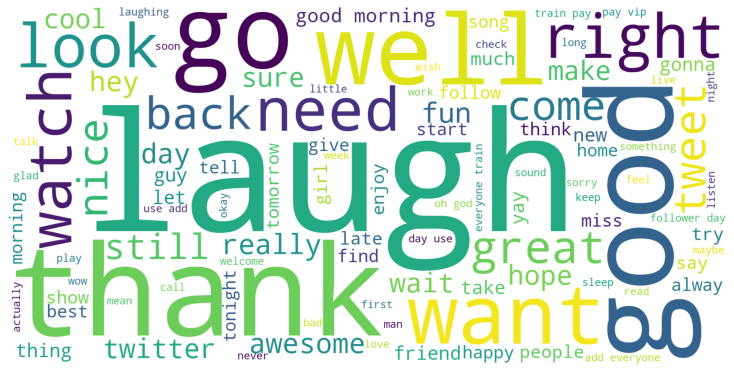

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


fig = plt.figure(figsize= (10,10))
wc = WordCloud(
    max_words=100, 
    width=1600,
    height=800,
    background_color='white'
).generate(' '.join(dataset_dev[dataset_dev['sentiment'] == 1]['text']))
plt.axis("off")
plt.tight_layout(pad=0)
# plt.title('Positive',fontsize=25)
plt.imshow(wc)
# wc.words_


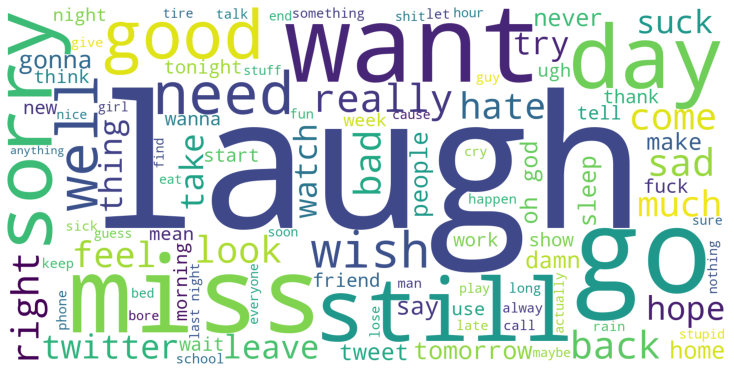

In [24]:
from wordcloud import WordCloud

plt.figure(figsize= (10,10))
wc = WordCloud(
    max_words=100, 
    width=1600,
    height=800,
    background_color='white'
).generate(' '.join(dataset_dev[dataset_dev['sentiment'] == 0]['text']))
plt.axis("off")
# plt.title('Negative',fontsize=25)
plt.tight_layout(pad=0)
plt.imshow(wc)
# wc.words_

In [25]:
X = dataset_dev.text.astype(str)
y = dataset_dev.sentiment.astype(str)
X_test_eval = dataset_eval.text.astype(str)

In [26]:
# spiliting data for train a model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(min_df=5,
                             max_df=0.8,
                             sublinear_tf=True,
                             use_idf=True
                            )
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  11499


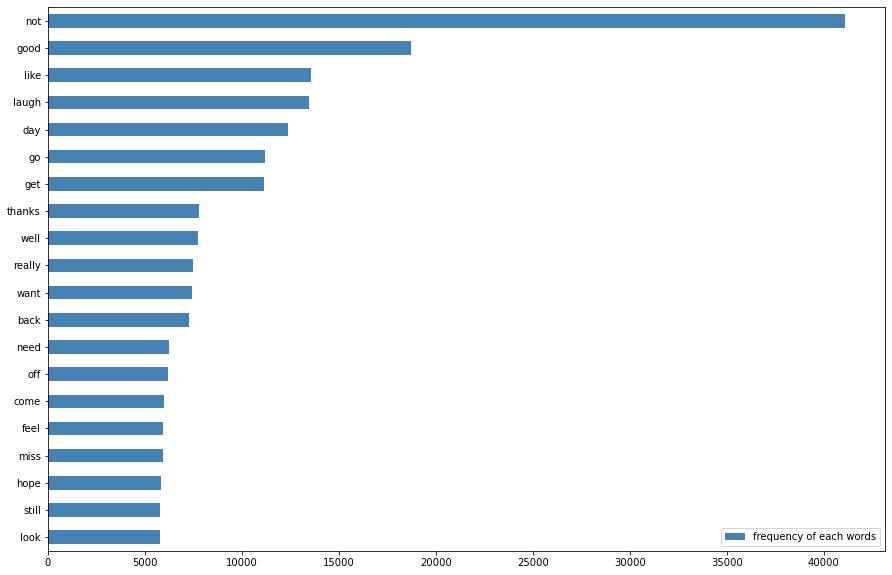

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


word_count_vect = CountVectorizer()
word_train_counts = word_count_vect.fit_transform(dataset_dev['text'].astype(str))
sum_words = word_train_counts.sum(axis=0)
words_freq = [(word, sum_words[0, i]) for word, i in word_count_vect.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
frequency = pd.DataFrame(words_freq, columns=['words', 'frequency of each words'])
frequency.head(20).plot(x='words', y='frequency of each words', kind='barh', figsize=(15, 10), color='steelblue')
plt.gca().invert_yaxis()
plt.ylabel('', fontsize=18)

# plt.title("Top 20 words in tweets")
plt.show()


In [29]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
X_test_eval = vectoriser.transform(X_test_eval)

In [30]:
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_pred2 = SVCmodel.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71     19068
           1       0.77      0.84      0.80     25931

    accuracy                           0.76     44999
   macro avg       0.76      0.75      0.75     44999
weighted avg       0.76      0.76      0.76     44999



In [31]:
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(solver='saga', fit_intercept = True)
LRmodel.fit(X_train, y_train)
y_pred3 = LRmodel.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71     19068
           1       0.78      0.85      0.81     25931

    accuracy                           0.77     44999
   macro avg       0.77      0.76      0.76     44999
weighted avg       0.77      0.77      0.77     44999



In [32]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt



BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred1 = BNBmodel.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70     19068
           1       0.77      0.82      0.80     25931

    accuracy                           0.76     44999
   macro avg       0.75      0.75      0.75     44999
weighted avg       0.76      0.76      0.76     44999



In [ ]:
y_prediction = LRmodel.predict(X_test_eval)
y_prediction
pd.DataFrame(y_prediction).to_csv('Desktop/submission.csv',index_label = 'Id', header = ['Predicted'])